In [3]:
from typing import Any

import numpy as np
import matplotlib.pyplot as plt

import eqm_finder

In [4]:
def plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array, psi_0, v_swell, zeta, plot_kwargs = {}):
    """Plots reduced free energy against lambda_r for some given range of lambda_r values.
    In the case of constant twist, the reduced free energy is equal to the free energy density."""

    free_energy_array = np.zeros(len(lambda_r_array))
    
    for i, lambda_r in enumerate(lambda_r_array):
        free_energy_array[i] = eqm_finder.calc_reduced_free_energy_density(psi_0, lambda_r, v_swell, zeta)

    plt.plot(lambda_r_array, free_energy_array, **plot_kwargs)
    plt.xlabel("$\\lambda_r$")
    plt.ylabel("$F$")

def plot_reduced_free_energy_vs_swell_anisotropy_constant_twist(lambda_r, psi_0, v_swell, zeta, plot_kwargs):
    """Plots reduced free energy against swell anisotropy = lambda_r/lambda_z for some given range of lambda_r values.
    In the case of constant twist, the reduced free energy is equal to the free energy density."""

    free_energy_array = eqm_finder.calc_reduced_free_energy_density(psi_0, lambda_r, v_swell, zeta)

    lambda_z = v_swell / lambda_r**2

    plt.plot(lambda_r / lambda_z, free_energy_array, **plot_kwargs)
    plt.xlabel("$\\lambda_r / \\lambda_z$")
    plt.ylabel("$F$")

# First look

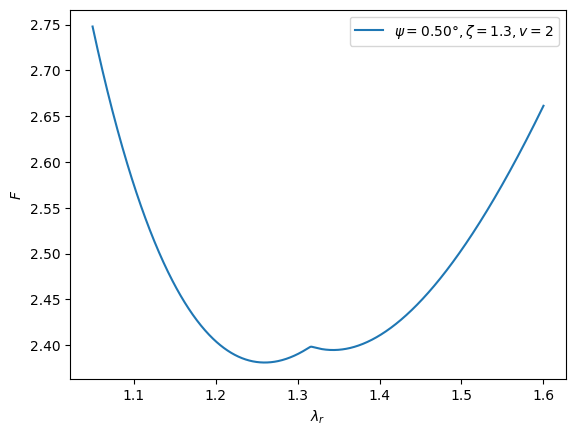

In [21]:
lambda_r_array_close = np.linspace(1.05, 1.6, 1000)
psi_0 = 0.5 * np.pi / 180
v_swell = 2
zeta = 1.3

plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array_close, psi_0, v_swell, zeta,
                                                    {"label": f"$\\psi = {psi_0 * 180/np.pi:.02f}\\degree, \\zeta = {zeta}, v = {v_swell}$"})

plt.legend(loc='best')
plt.show()

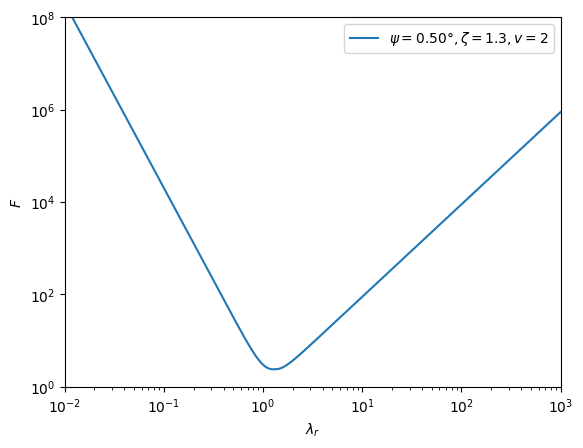

In [28]:
lambda_r_array_far = np.logspace(-2, 3, 1000, base=10)
psi_0 = 0.5 * np.pi / 180
v_swell = 2
zeta = 1.3

plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array_far, psi_0, v_swell, zeta,
                                                    {"label": f"$\\psi = {psi_0 * 180/np.pi:.02f}\\degree, \\zeta = {zeta}, v = {v_swell}$"})

plt.legend(loc='best')

plt.xlim(1e-2, 1e3)
plt.ylim(1e0, 1e8)

plt.xscale('log')
plt.yscale('log')
plt.show()

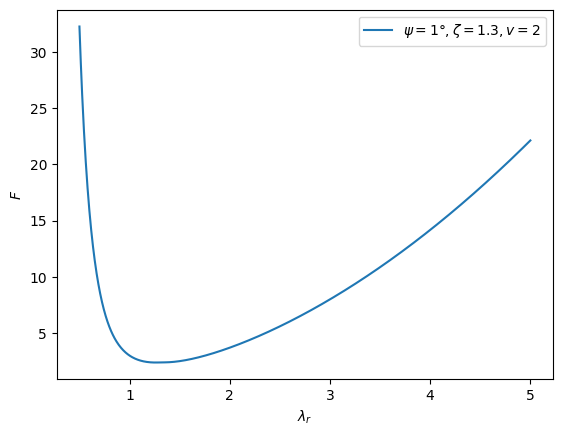

In [5]:
plot_reduced_free_energy_vs_lambda_r_constant_twist(np.linspace(0.5, 5.0, 1000), 1 * np.pi / 180, 2, 1.3, {"label": "$\\psi = 1\\degree, \\zeta = 1.3, v = 2$"})

plt.legend(loc='best')
plt.show()

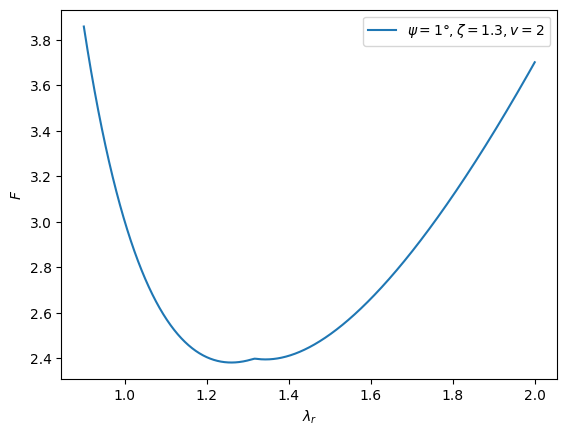

In [6]:
plot_reduced_free_energy_vs_lambda_r_constant_twist(np.linspace(0.9, 2, 1000), 1 * np.pi / 180, 2, 1.3, {"label": "$\\psi = 1\\degree, \\zeta = 1.3, v = 2$"})

plt.legend(loc='best')
plt.show()

# Vary Parameters
## Vary zeta

In [76]:
def plot_reduced_free_energy_vs_lambda_r_vary_zeta(lambda_r_array, psi_0, v_swell, zeta_array):
    for zeta in zeta_array:
        plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$\\zeta = {zeta:.01f}$"})

    plt.legend(loc='best')
    plt.title(f"$\\psi_0 = {psi_0 * 180 / np.pi:.01f}\\degree, v = {v_swell}$")

def plot_reduced_free_energy_vs_vs_swell_anisotropy_vary_zeta(lambda_r_array, psi_0, v_swell, zeta_array):
    for zeta in zeta_array:
        plot_reduced_free_energy_vs_swell_anisotropy_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$\\zeta = {zeta:.01f}$"})

    plt.legend(loc='best')
    plt.title(f"$\\psi_0 = {psi_0 * 180 / np.pi:.01f}\\degree, v = {v_swell}$")

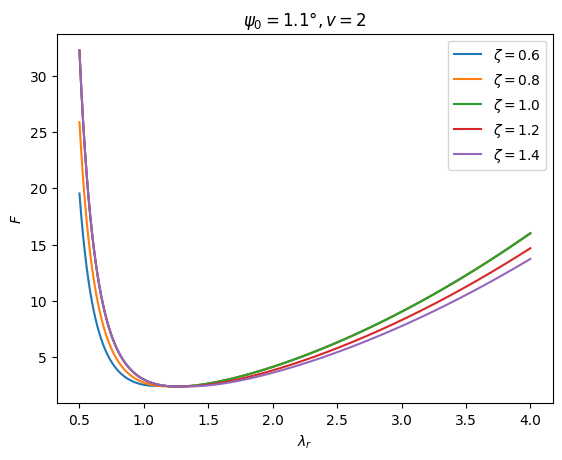

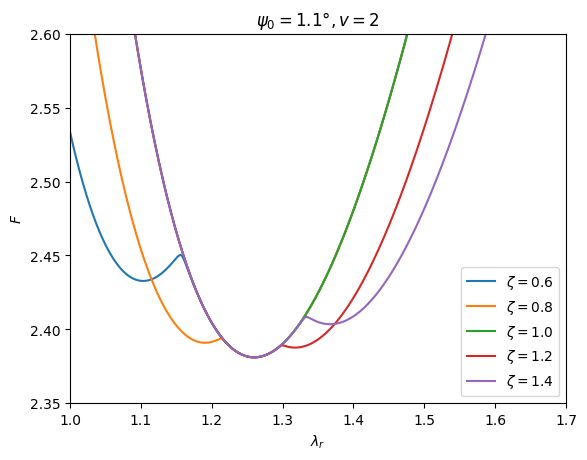

In [34]:
lambda_r_array_wide = np.linspace(0.5, 4, 1000)
lambda_r_array_close = np.linspace(0.8, 1.6, 1000)

ONE = 1 + 1e-10

zeta_list = [0.6, 0.8, ONE, 1.2, 1.4]

plot_reduced_free_energy_vs_lambda_r_vary_zeta(lambda_r_array_wide, 0.02, 2, zeta_list)
plt.show()

plot_reduced_free_energy_vs_lambda_r_vary_zeta(lambda_r_array_close, 0.02, 2, zeta_list)
plt.xlim(1,1.7)
plt.ylim(2.35,2.6)
plt.show()

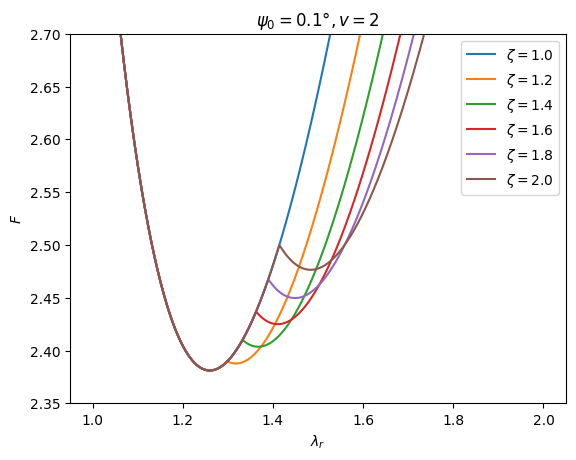

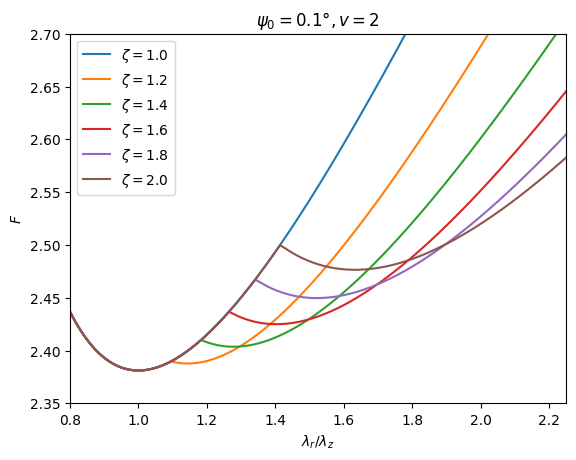

In [79]:
plot_reduced_free_energy_vs_lambda_r_vary_zeta(np.linspace(1, 2, 1000), 0.1 * np.pi / 180, 2, [ONE, 1.2, 1.4, 1.6, 1.8, 2])
#plt.xlim(1,1.7)
plt.ylim(2.35,2.7)
plt.show()

plot_reduced_free_energy_vs_vs_swell_anisotropy_vary_zeta(np.linspace(1, 2, 1000), 0.1 * np.pi / 180, 2, [ONE, 1.2, 1.4, 1.6, 1.8, 2])
plt.xlim(0.8, 2.25)
plt.ylim(2.35,2.7)

plt.show()

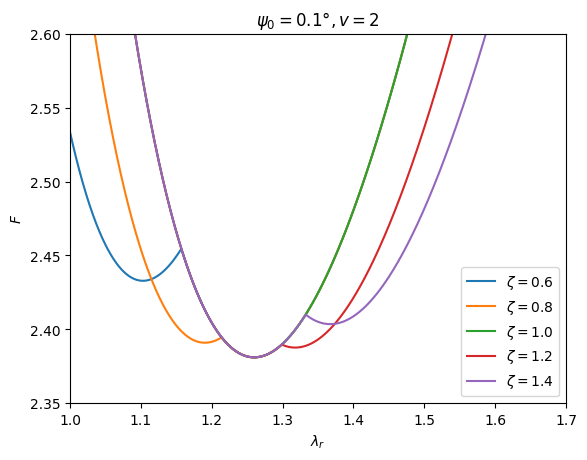

In [74]:
zeta_list = [0.6, 0.8, ONE, 1.2, 1.4]

psi_0 = 0.1 * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_zeta(lambda_r_array_close, psi_0, 2, zeta_list)
plt.xlim(1,1.7)
plt.ylim(2.35,2.6)
plt.show()

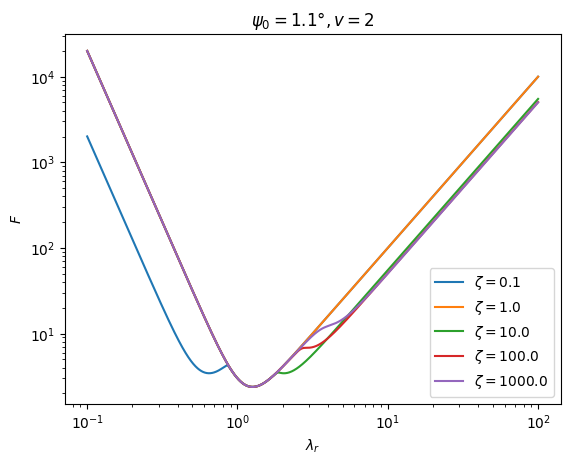

In [10]:
plot_reduced_free_energy_vs_lambda_r_vary_zeta(np.logspace(-1, 2, 1000, base=10), 0.02, 2, [0.1, ONE, 10, 100, 1000])
#plt.xlim(1,1.7)
#plt.ylim(2.35,2.7)

plt.xscale('log')
plt.yscale('log')

plt.show()

The low-lambda r power law is highly independent of zeta (provided zeta > 1?)
The high-lambda r power-law has a constant prefactor in large-zeta.

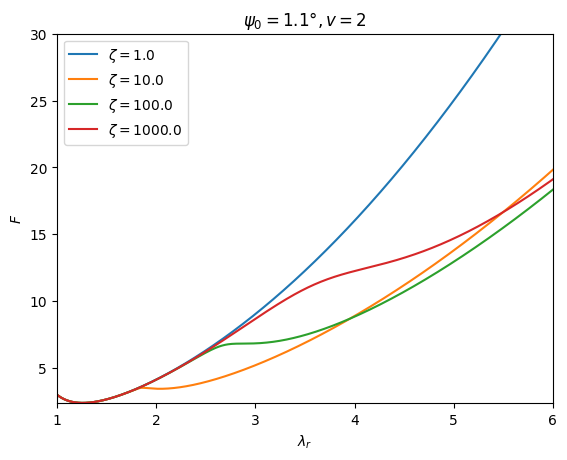

In [11]:
plot_reduced_free_energy_vs_lambda_r_vary_zeta(np.logspace(0, 1, 1000, base=10), 0.02, 2, [ONE, 10, 100, 1000])
plt.xlim(1,6)
plt.ylim(2.35,30)

#plt.xscale('log')
#plt.yscale('log')

plt.show()

## Vary initial twist-angle

In [12]:
def plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array, psi_0_array, v_swell, zeta):
    for psi_0 in psi_0_array:
        plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$\\psi_0 = {psi_0 * 180 / np.pi:.01f}\\degree$"})

    plt.legend(loc='best')
    plt.title(f"$\\zeta = {zeta:.01f}, v = {v_swell}$")

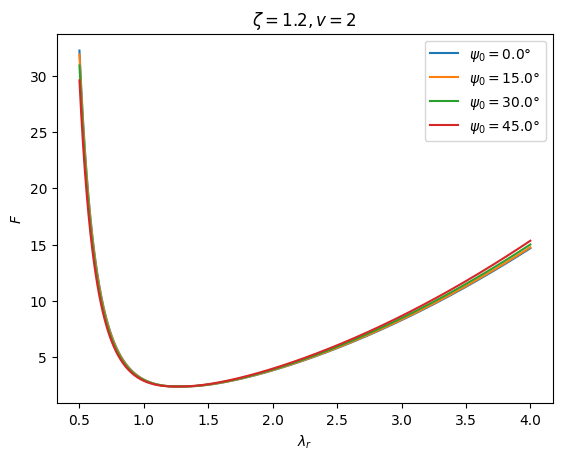

In [13]:
psi_0_wide_to_45 = np.array([1e-6, 15, 30, 45]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_wide, psi_0_wide_to_45, 2, 1.2)

plt.show()

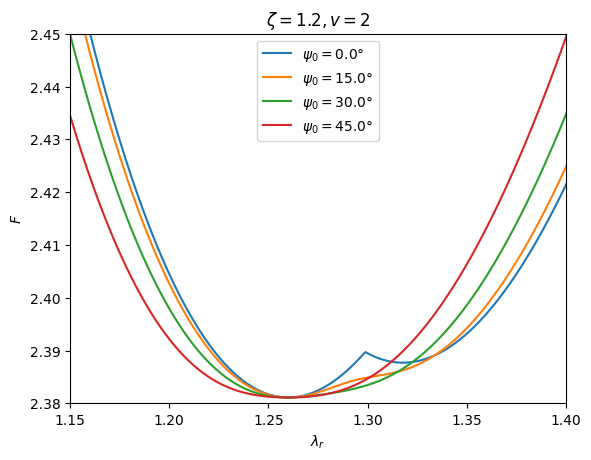

In [14]:
plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_wide_to_45, 2, 1.2)

plt.xlim(1.15, 1.4)
plt.ylim(2.38, 2.45)

plt.show()

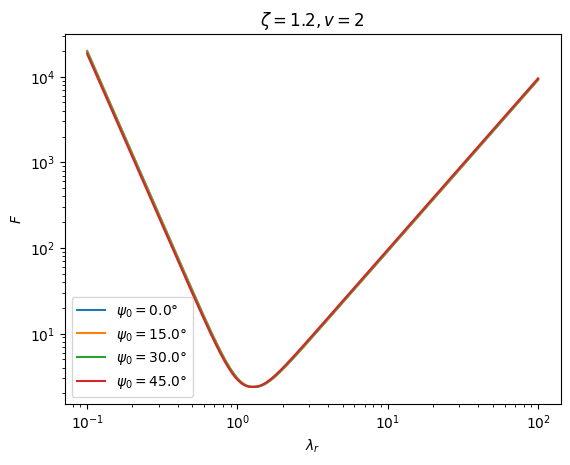

In [15]:
psi_wide_to_90 = np.array([1e-6, 15, 30, 45, 60, 75, 90]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(np.logspace(-1, 2, 1000, base=10), psi_0_wide_to_45, 2, 1.2)

plt.xscale('log')
plt.yscale('log')

plt.show()

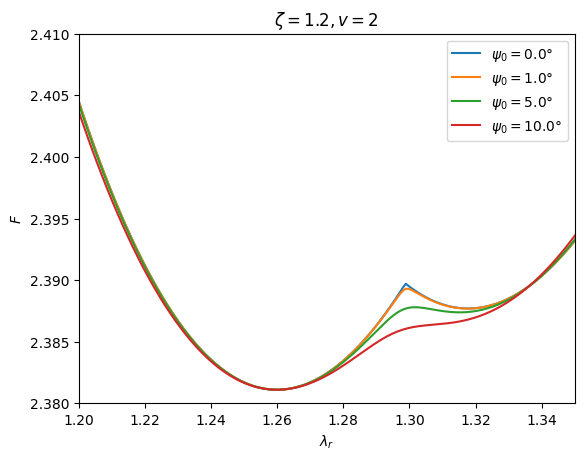

In [16]:
psi_0_near_zero = np.array([1e-6, 1, 5, 10]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_near_zero, 2, 1.2)

plt.xlim(1.2, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

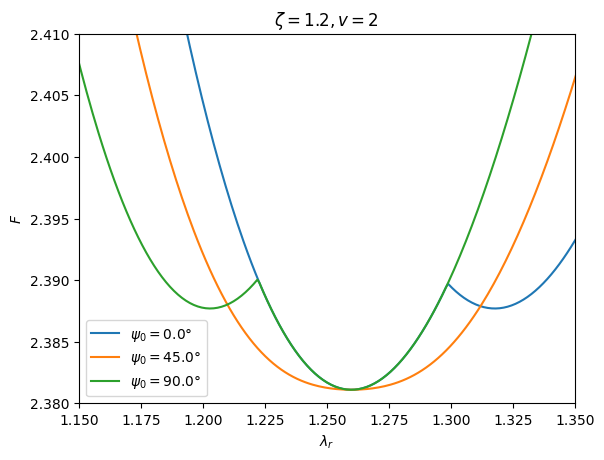

In [17]:
psi_0_wide_45 = np.array([1e-6, 45, 90]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_wide_45, 2, 1.2)

plt.xlim(1.15, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

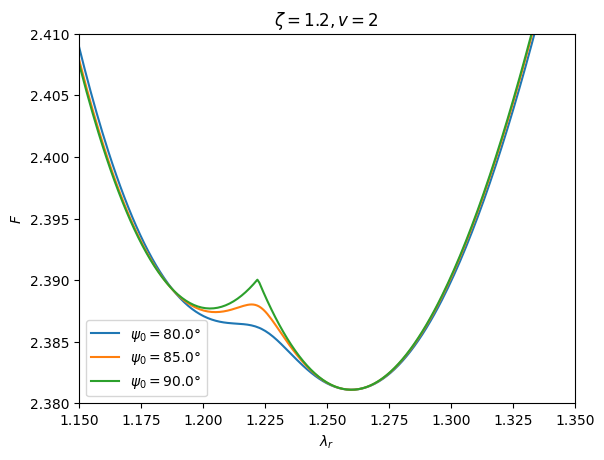

In [18]:
psi_0_near_90 = np.array([80, 85, 90]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_near_90, 2, 1.2)

plt.xlim(1.15, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

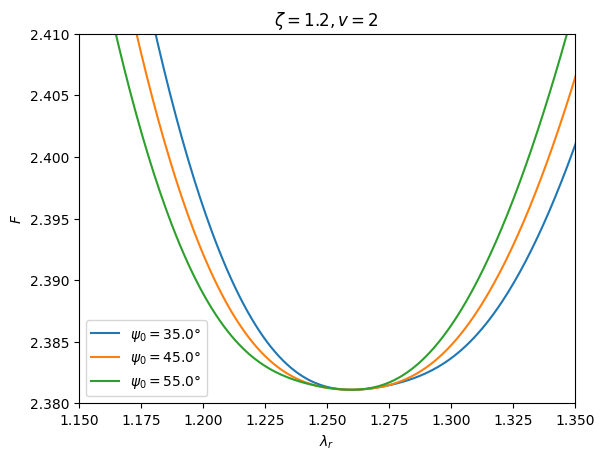

In [19]:
psi_0_near_45 = np.array([35, 45, 55]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_near_45, 2, 1.2)

plt.xlim(1.15, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

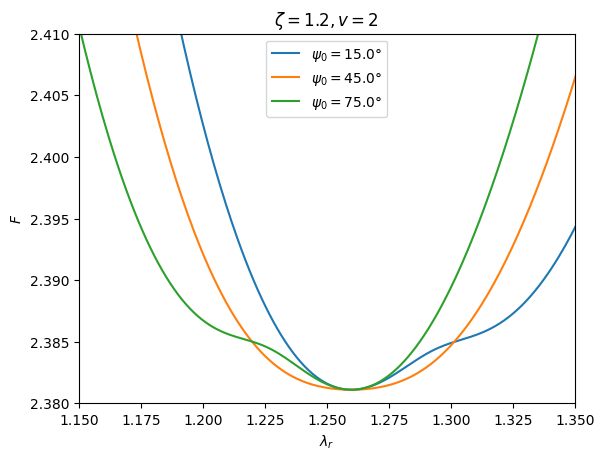

In [20]:
psi_0_around_45 = np.array([15, 45, 75]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_around_45, 2, 1.2)

plt.xlim(1.15, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

## Vary v

In [51]:
def plot_reduced_free_energy_vs_lambda_r_vary_v_swell(lambda_r_array, psi_0, v_swell_array, zeta):
    for v_swell in v_swell_array:
        plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$v = {v_swell}$"})

    plt.legend(loc='best')
    plt.title(f"$\\zeta = {zeta:.01f}, \\psi_0 = {psi_0 * 180/np.pi:.01f}\\degree$")


def plot_reduced_free_energy_vs_swell_anisotropy_vary_v_swell(lambda_r_array, psi_0, v_swell_array, zeta):
    for v_swell in v_swell_array:
        plot_reduced_free_energy_vs_swell_anisotropy_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$v = {v_swell}$"})

    plt.legend(loc='best')
    plt.title(f"$\\zeta = {zeta:.01f}, \\psi_0 = {psi_0 * 180/np.pi:.01f}\\degree$")

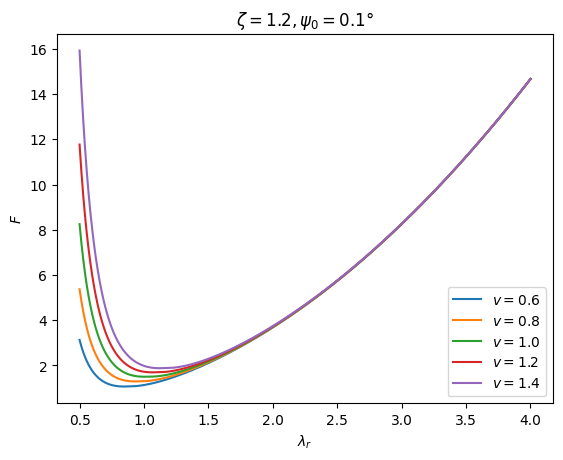

In [35]:
plot_reduced_free_energy_vs_lambda_r_vary_v_swell(lambda_r_array_wide, 0.1 * np.pi / 180, [0.6, 0.8, 1.0, 1.2, 1.4], 1.2)

plt.show()

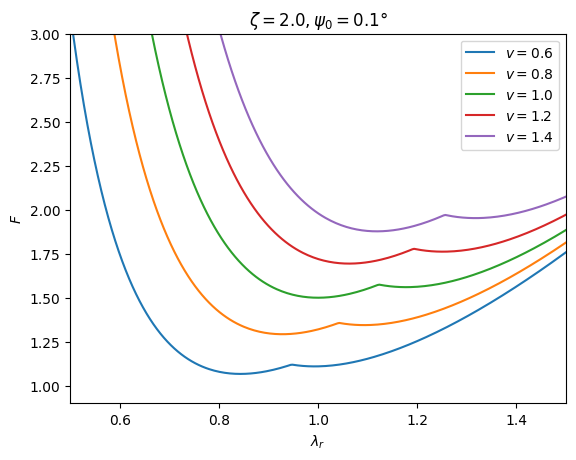

In [49]:
plot_reduced_free_energy_vs_lambda_r_vary_v_swell(lambda_r_array_wide, 0.1 * np.pi / 180, [0.6, 0.8, 1.0, 1.2, 1.4], 2)

plt.xlim(0.5,1.5)
plt.ylim(0.9,3)

plt.show()

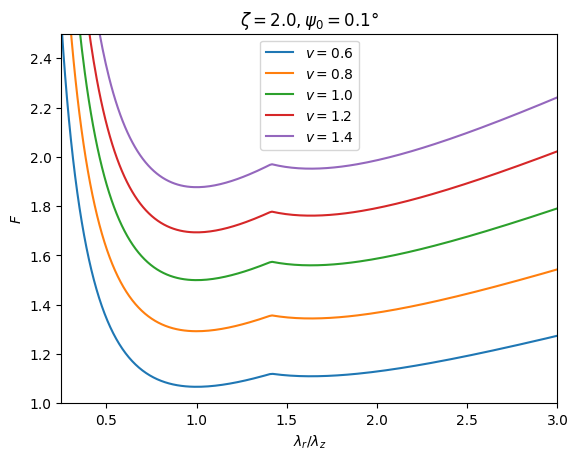

In [66]:
plot_reduced_free_energy_vs_swell_anisotropy_vary_v_swell(lambda_r_array_wide, 0.1 * np.pi / 180, [0.6, 0.8, 1.0, 1.2, 1.4], 2)

plt.xlim(0.25,3)
plt.ylim(1,2.5)

plt.show()

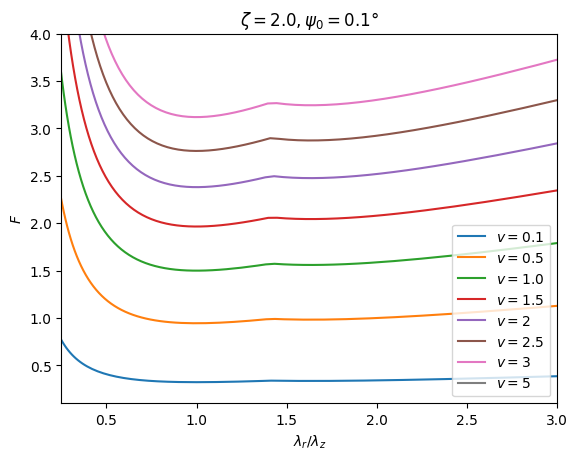

In [73]:
plot_reduced_free_energy_vs_swell_anisotropy_vary_v_swell(lambda_r_array_far, 0.1 * np.pi / 180, [0.1, 0.5, 1.0, 1.5, 2, 2.5, 3, 5], 2)

plt.xlim(0.25,3)
plt.ylim(0.1,4)

plt.show()

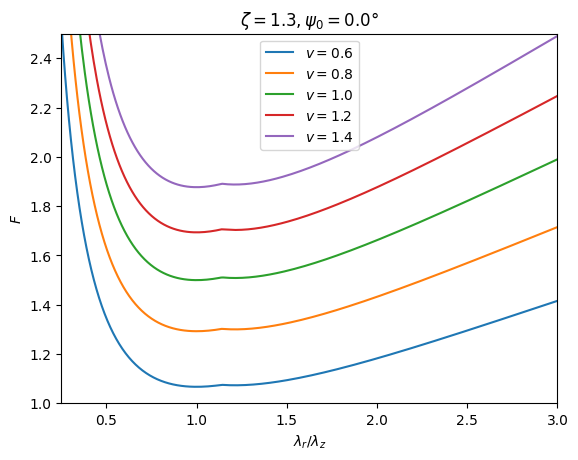

In [81]:
plot_reduced_free_energy_vs_swell_anisotropy_vary_v_swell(lambda_r_array_wide, 0.01 * np.pi / 180, [0.6, 0.8, 1.0, 1.2, 1.4], 1.3)

plt.xlim(0.25,3)
plt.ylim(1,2.5)

plt.show()